In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../spam_detection/email_dataset/spam.csv', encoding='latin-1')

# Display structure
print(df.columns)
print(df.head())


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
# Keep only needed columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode labels: ham → 0, spam → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Features and labels
X = df['text']
y = df['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ("bow", CountVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1, 1),  # unigram bag-of-words
        max_features=1000
    )),
    ("clf", MultinomialNB(alpha=1.0))
])

# Train
pipeline.fit(X_train, y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('clf', MultinomialNB())])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ("bow", CountVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1, 1),  # unigram bag-of-words
        max_features=1000
    )),
    ("clf", MultinomialNB(alpha=1.0))
])

# Train
pipeline.fit(X_train, y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(max_features=1000, stop_words='english')),
                ('clf', MultinomialNB())])

Accuracy: 0.9839
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



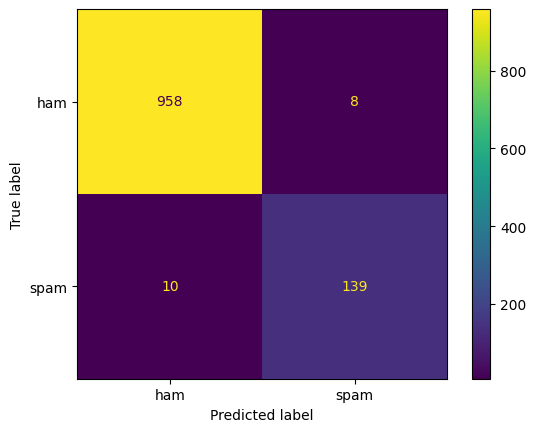

In [7]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred = pipeline.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['ham', 'spam'])
plt.show()
